<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking@slim")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘Rcpp’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘checkmate’, ‘matrixStats’, ‘V8’





shape (NA -> 1.4.6) [CRAN]


Installing 1 packages: shape

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpA9Z3R2/remotese63efff1bc/rmcelreath-rethinking-cbcb8ba/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.13.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rethinking)

Loading required package: parallel

rethinking (Version 2.13.2)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




# Chapter 3
## Easy
The *Easy* problems use the code from the globe-tossing example (encountered in Ch 2).  

In [ ]:
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
likelihood <- dbinom(6, size=9, prob=p_grid) # 6 "water" in 9 globe tosses
posterior <- likelihood*prior
posterior <- posterior/sum(posterior)

set.seed(42) # This makes sure that the random-number generator produces the same values across computers.  This way, you can make sure that we're getting the same answers.
samples <- sample(x=p_grid, prob=posterior, size=1e4, replace=TRUE) # This codes samples from the values in x=p_grid.
                                                                    # Since we used grid approxiamation, we also have a posterior-probability estimate for each value in p_grid.
                                                                    # We draw size=1e4=10,000 samples from the values in x=p_grid;
                                                                    # with each draw, each sample has the probability prob=posterior of being drawn,
                                                                    # so p_grid values with higher posterior values are drawn more often than p_grid values with lower posteriors.
                                                                    # The replace=TRUE argument means that we 'replace' the p_grid value after drawing it;
                                                                    # in this way, p_grid values can be drawn multiple times.
                                                                    # See ?sample for more information
#?sample

In [ ]:
# 3E1
sum(samples < 0.2) / length(samples) *100

# 3E2
sum(samples > 0.8) / length(samples) *100

# 3E3
sum(samples > 0.2 & samples < 0.8) / length(samples) *100

[1] 0.04

[1] 11.16

[1] 88.8

### 3E4-3E5
#### Questions
4.   20% of the posterior probability lies below which value of *p*?
5.   20% of the posterior probability lies above which value of *p*?

#### Answer
These questions are something like the inverse of 3E1-3E3.  Whereas 3E1-3E3:
*   <u>give the *value of p* </u> and <u>ask for the *amount of posterior probability* above/below p</u>,

the 3E4-3E5 problems
*   <u>give the *amount of posterior probability* above/below p</u> and <u>ask for the *value of p*</u>.

The value of p, the thing asked for in these questions, is called a "quantile".

In [ ]:
# 3E4
quantile(samples, 0.2)

# 3E5
quantile(samples, 0.8)

### 3E6-3E7
#### Question
6.   Which values of p contain the narrowest interval equal to 66% of the posterior probability?
7.   Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

#### Answer
These two questions ask for different intervals of the posterior distribution.  The "narrowest" interval (3E6) is asking for the "highest posterior density interval" (HPDI), which we can think of as the interval of probability mass that has the smallest footprint of parameter values.  The interval with "equal posterior probability both above and below the interval" (3E7) refers to the percentile interval (PI); this is the interval with equal probability mass outside of the interval on either side of the interval.

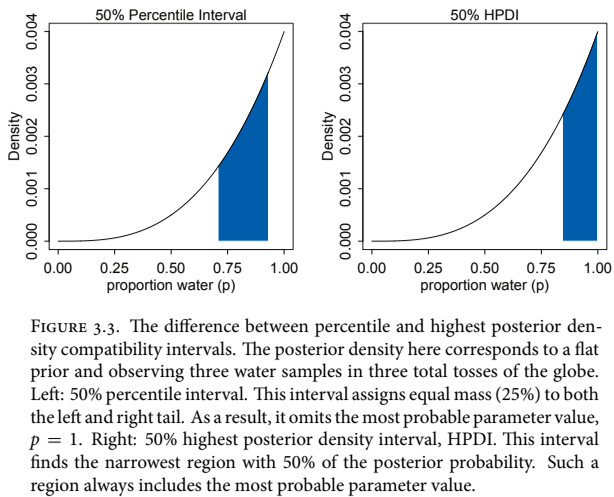

In [ ]:
# 3E6
round(
  HPDI(samples, prob=0.66),
  4)*100

|0.66 0.66| 
50.85 77.38

In [ ]:
# 3E7
round(
  PI(samples, prob=0.66),
  4)*100

17%   83% 
50.25 76.98

## Medium
### 3M1-3M2
#### Questions
1.  Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.
2.   Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.

#### Answer
Just as questions 3E1-3E7 used the code at the top of the page, most of the Medium questions will use this code.

|0.9  0.9| 
33.63 72.37

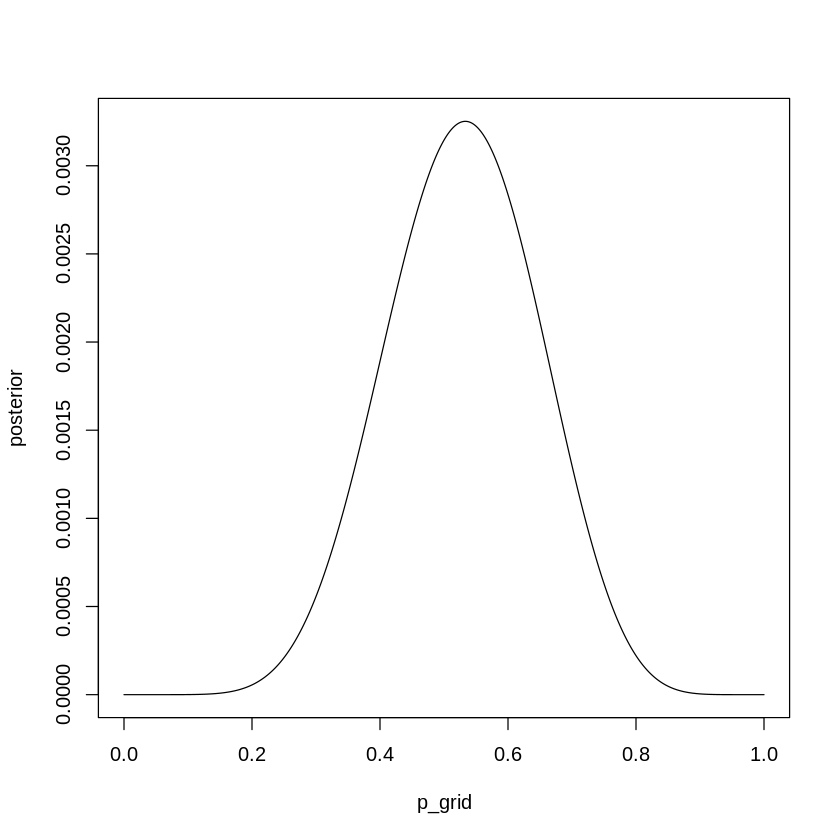

In [ ]:
# 3M1
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
likelihood <- dbinom(8, size=15, prob=p_grid) # 8 "water" in 15 globe tosses
posterior <- likelihood*prior
posterior <- posterior/sum(posterior)

# 3M2
samples <- sample(x=p_grid, prob=posterior, size=1e4, replace=TRUE)

round(HPDI(samples, 0.9), 4)*100

plot(posterior ~ p_grid, type="l")

In [ ]:
a <- HPDI(samples, 0.9)
str(a)
a[1]
a[2]
a[2] - a[1]

 Named num [1:2] 0.336 0.724
 - attr(*, "names")= chr [1:2] "|0.9" "0.9|"


|0.9 
0.3363363

0.9| 
0.7237237

0.9| 
0.3873874

### 3M3-3M4
#### Questions
3.   Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing  8 water in 15 tosses?
4.   Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

#### Answer
A posterior distribution has two types of uncertainty.  There is uncertainty about the *true* value of the parameter(s) (in this case, p) and there is uncertainty due to sampling--whatever the *true* value of p, even if we knew it, our sample data is finite and thus won't perfectly reflect it.

The first type of uncertainty, the uncertainty about the *true* value, is captured by the posterior distribution.  But the second type of uncertainty, uncertainy abot how well the data reflects p, is not captured in the posterior distribution.  

Why is this important?  One reason is that we want to check the adequacy of our models.  Our models are not perfect representations of reality.  Instead, they are our best guess.  Since they are guesses, we should *check* them.  One way to check them is to see how well they predict our data.  For this, we cannot use only the posterior distribution since our data was also affected by the limitations of our sampling.  Thus, we want to find a way to capture both forms of uncertainy.

A method for doing this is called posterior predictive checks (PPCs).  In PPCs, we
1.   sample parameter values from the posterior distribution; then,
2.   with each parameter sample, we simulate data.  

Thus, the first step captures the uncertainty of p and the second step captures the uncertainty of the sampling process.  We do this many times, ultimately generating a posterior-predictive distribution (PPD).  Since the PPD contains an additional form of uncertainy, it will be more spread out than the posterior distribution.

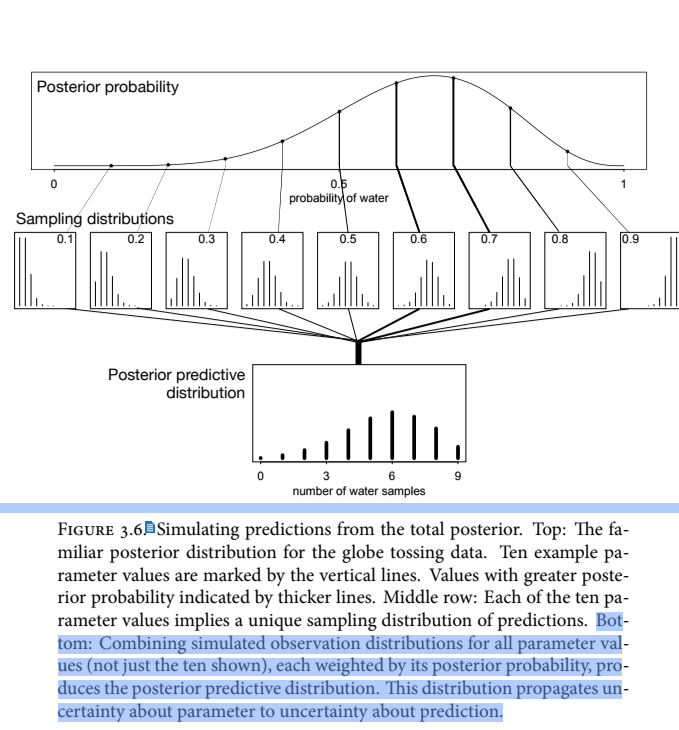

Roughly speaking, if the simulated data *looks* like our actual data, we gain more confidence in our model.  How similar does our simulated data and actual data need to be?  This is a decision to be made by you, your community, and your stakeholders.

[1] 0.1431

[1] 0.1765

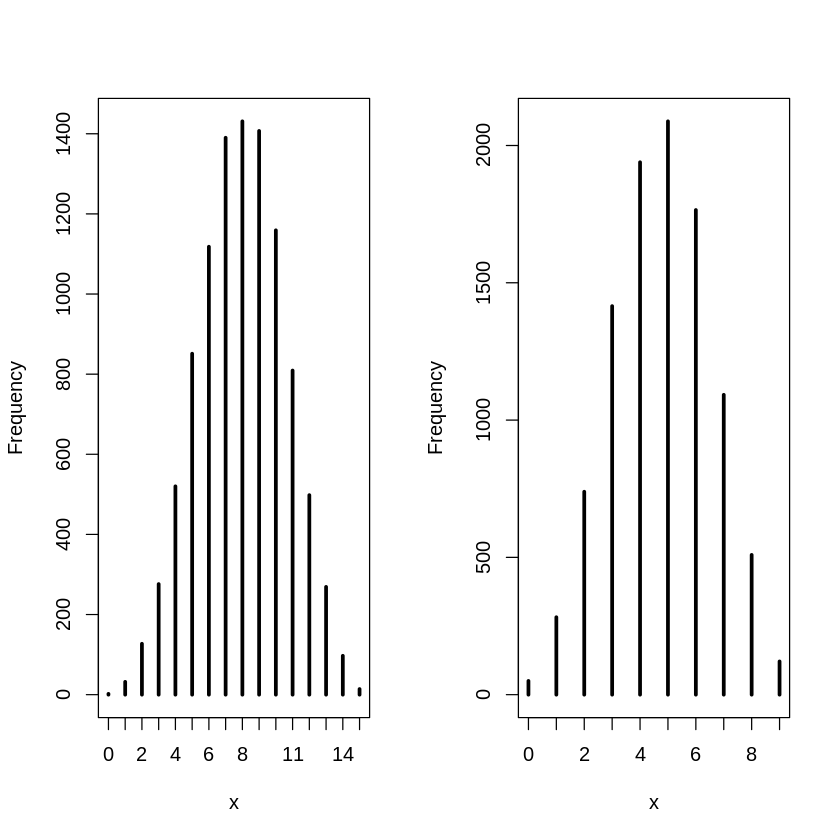

In [ ]:
# 3M3
## We start by creating our PPD.
## Since we believe our data to be distributed as a binomial distribution, we use rbinom().
## We will create n=10,000 total samples of size=15 tosses.
## Each set of 15 tosses will assume some value p, representing a possible proportion of water.
## The value of p is contained in the prob=samples argument;
## this is the piece that ties the posterior distribution to PPD:
## since samples contains the possible proportions of water,
## and these possible proportions of water are represented according to the posterior distribution,
## we draw more 15-toss sets from more likely values of p.
## Thus, the prob=samples covers the 1st type of uncertainy (what is the true value of p?)
## and the sampling procedure of rbinom() covers the sampling uncertainty.
water8toss15 <- rbinom(n=10000, size=15, prob=samples)

## From our PPD, we simply see how many samples meet our criteria
sum(water8toss15==8)/length(water8toss15)


# 3M4
water6toss9 <- rbinom(n=10000, size=9, prob=samples)
sum(water6toss9==6)/length(water6toss9)

par(mfrow=c(1,2))
simplehist(water8toss15)
simplehist(water6toss9)

Now, these two PPCs may or may not be interesting or useful. It really is up to you to determine what types of PPCs to use.  For instance, it may be more interesting to know how likely a particular interval is.  In this case, the PPC may look like:

### 3M5
#### Question
Start over at 3M1, but now use a prior that is zero below p = 0.5 and a constant above p = 0.5.  This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value p = 0.7.

#### Answer
We'll start by copy-pasting the code from 3M1, but changing the prior.

In [ ]:
# 3M1, new prior
p_grid <- seq(from=0, to=1, length.out=1000)
prior2 <- c(rep(0, 500), rep(1, 500))
likelihood2 <- dbinom(8, size=15, prob=p_grid) # 8 "water" in 15 globe tosses
posterior2 <- likelihood*prior2
posterior2 <- posterior2/sum(posterior2)

Let's plot the prior, likelihood, and posterior for the flat-prior version and this version.  We'll also indicate where the true value of *p* is.

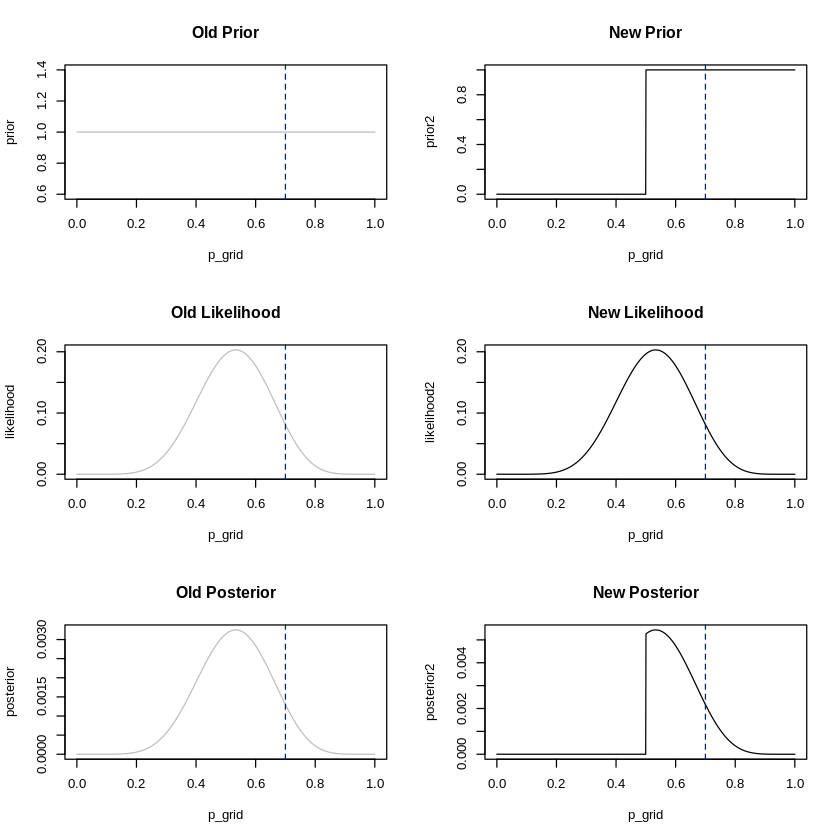

In [ ]:
par(mfrow=c(3,2))

plot(prior ~ p_grid, type="l", col="grey", main="Old Prior")
abline(v=0.7, col="blue", lty=2)

plot(prior2 ~ p_grid, type="l", col="black", main="New Prior")
abline(v=0.7, col="blue", lty=2)

plot(likelihood ~ p_grid, type="l", col="grey", main="Old Likelihood")
abline(v=0.7, col="blue", lty=2)

plot(likelihood2 ~ p_grid, type="l", col="black", main="New Likelihood")
abline(v=0.7, col="blue", lty=2)

plot(posterior ~ p_grid, type="l", col="grey", main="Old Posterior")
abline(v=0.7, col="blue", lty=2)

plot(posterior2 ~ p_grid, type="l", col="black", main="New Posterior")
abline(v=0.7, col="blue", lty=2)

So the black is the new prior; the verticle blue, dotted line is the actual value for p.  Notice that the new posterior has no mass below p=0.5.  This has shifted the y-axis to larger values since the total probability mass is now condensed into a smaller p_grid footprint.

Next, we sample from our posterior and estimate the 90% HPDI.

In [ ]:
# 3M2, new prior
samples2 <- sample(x=p_grid, prob=posterior2, size=1e4, replace=TRUE)

# Old 90% HPDI
round(HPDI(samples, 0.9), 4)*100

# New 90% HPDI
round(HPDI(samples2, 0.9), 4)*100



|0.9  0.9| 
33.93 72.67

|0.9  0.9| 
50.05 71.37

Comparing the Old to the New HPDI, we see that the New HPDI 1) truncates at just over p=0.5 compared to p=0.34, and 2) is narrower.

Now we must repeat 3M3 and 3M4, creating PPCs for 8/15 and 6/9.

[1] 0.1589

[1] 0.1431

[1] 0.2349

[1] 0.1765

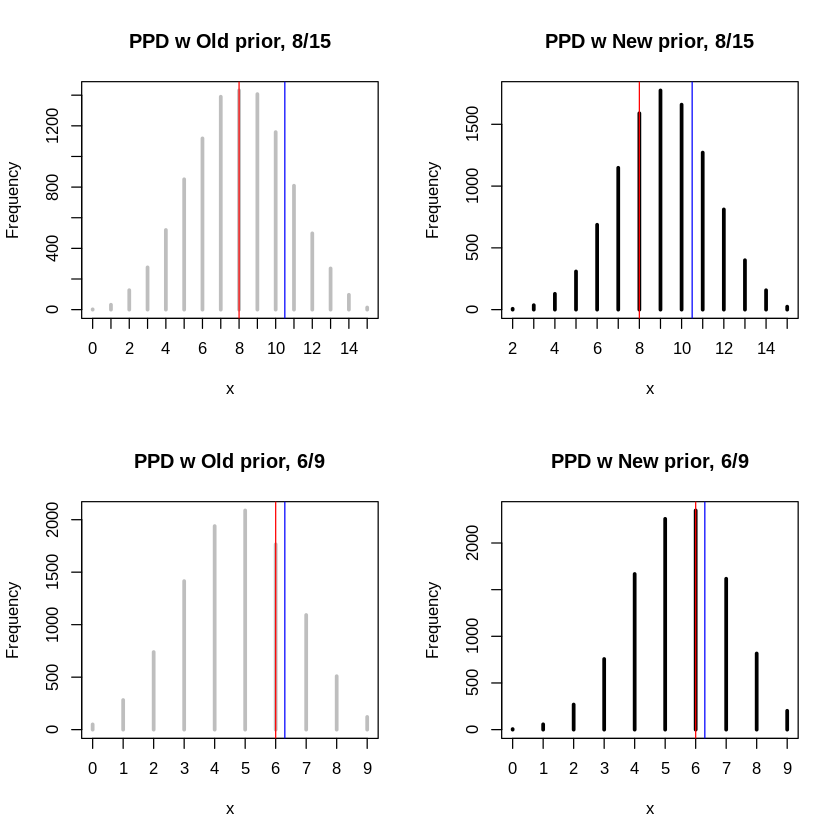

In [ ]:
# 3M3, New prior
New_water8toss15 <- rbinom(n=10000, size=15, prob=samples2)
sum(New_water8toss15==8)/length(New_water8toss15)

# old prior
sum(water8toss15==8)/length(water8toss15)


# 3M4, New prior
New_water6toss9 <- rbinom(n=10000, size=9, prob=samples2)
sum(New_water6toss9==6)/length(New_water6toss9)

# old prior
sum(water6toss9==6)/length(water6toss9)



par(mfrow=c(2,2))
simplehist(water8toss15, main="PPD w Old prior, 8/15", col="grey")
abline(v=0.7*15, col="blue")
abline(v=8, col="red")
simplehist(New_water8toss15, main="PPD w New prior, 8/15")
abline(v=0.7*15, col="blue")
abline(v=8, col="red")
simplehist(water6toss9, main="PPD w Old prior, 6/9", col="grey")
abline(v=0.7*9, col="blue")
abline(v=6, col="red")
simplehist(New_water6toss9, main="PPD w New prior, 6/9")
abline(v=0.7*9, col="blue")
abline(v=6, col="red")

From the posterior-predictive probabilities, notice that the New prior gives higher values.  Why?  This is because the posterior mass that *was* allocated to values p<0.5 under the old prior are now allocated to values p>0.5.  

In the posterior-predictive plots, I've not only presented histograms for the PPCs, but again added a blue line for the expected value of waters (70% of tosses) and the observed number of waters for each PPCs.  It is especially apparent with the 8/15 PPC that, whereas the old prior shifted most of its mass over the observed 8/15 value, the new prior shifts more mass away from the observed value and closer to the expected value?  Why, again it's because the new prior allocated probability mass away from lower values of p to higher values of p.

### 3M6
#### Question
Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you want the 99% percentile interval of the posterior distribution of p to be only 0.05 wide. This means the distance between the upper and lower bound of the interval should be 0.05. How many times will you have to toss the globe to do this?

#### Answer
This question is asking us to estimate the sample size needed for a desired precision of estimate.  

The way we tackle this type of problem will depend on what we can assume about the posterior, i.e., our prior.  So I'm going to start by assuming a flat prior and act as though we are planning the experiment--specifically, how many globe tosses we need to plan for.

To do this, we need to iterate over progressively larger numbers of tosses until we find a HPDIs that are < 0.05.


[1] 3033 3040 3117 3145 3151 3154 3156 3172 3204 3216 3239 3240 3252 3282 3291
 [16] 3293 3295 3312 3328 3333 3336 3366 3371 3377 3410 3423 3432 3439 3448 3466
 [31] 3473 3477 3485 3498 3504 3513 3527 3529 3533 3536 3541 3550 3557 3560 3577
 [46] 3578 3580 3588 3589 3590 3593 3599 3602 3614 3623 3628 3629 3642 3644 3659
 [61] 3662 3670 3677 3682 3685 3688 3690 3691 3694 3697 3700 3712 3719 3732 3733
 [76] 3734 3739 3744 3763 3770 3771 3778 3781 3782 3784 3790 3793 3794 3795 3796
 [91] 3798 3804 3810 3813 3824 3831 3833 3836 3842 3843 3845 3853 3855 3857 3863
[106] 3864 3866 3874 3875 3876 3877 3881 3882 3884 3887 3888 3896 3898 3899 3901
[121] 3905 3908 3912 3923 3924 3930 3937 3940 3945 3948 3949 3953 3957 3958 3960
[136] 3963 3969 3974 3976 3977 3985 3986 3988 3991 3993 3998 3999 4005 4006 4009
[151] 4010 4015 4017 4018 4021 4022 4025 4028 4033 4034 4035 4036 4037 4038 4041
[166] 4043 4044 4045 4048 4051 4055 4073 4074 4077 4078 4079 4083 4085 4087 4092
[181] 4094 4095 4100 4102 4103 4105 4107 4109 4112 4114 4115 4119 4122 4124 4125
[196] 4126 4127 4128 4129 4131 4133 4134 4135 4136 4137 4139 4141 4142 4143 4145
[211] 4146 4153 4156 4157 4158 4160 4161 4164 4165 4171 4174 4175 4177 4178 4183
[226] 4185 4187 4188 4189 4197 4199 4201 4203 4207 4208 4209 4212 4213 4214 4216
[241] 4217 4221 4223 4224 4230 4231 4232 4233 4234 4236 4237 4238 4240 4244 4245
[256] 4249 4251 4252 4253 4257 4259 4260 4261 4262 4266 4268 4272 4275 4276 4279
[271] 4280 4281 4282 4284 4286 4291 4292 4293 4295 4296 4297 4299 4301 4303 4304
[286] 4305 4307 4310 4313 4314 4315 4316 4317 4320 4321 4322 4323 4327 4331 4334
[301] 4335 4337 4340 4341 4342 4343 4344 4351 4353 4354 4358 4362 4364 4366 4367
[316] 4368 4373 4376 4377 4378 4380 4381 4384 4386 4387 4388 4391 4392 4394 4395
[331] 4396 4397 4399 4400 4401 4405 4406 4407 4408 4414 4415 4416 4417 4418 4420
[346] 4421 4423 4424 4427 4428 4430 4431 4432 4433 4435 4436 4437 4438 4439 4440
[361] 4441 4442 4443 4444 4445 4446 4447 4450 4451 4454 4455 4456 4457 4460 4464
[376] 4465 4468 4469 4471 4472 4473 4475 4476 4478 4481 4482 4485 4486 4487 4489
[391] 4492 4496 4499 4501 4502 4504 4505 4506 4508 4511 4512 4513 4514 4516 4517
[406] 4518 4519 4520 4521 4522 4524 4525 4526 4528 4529 4530 4533 4534 4535 4536
[421] 4537 4539 4540 4541 4544 4548 4550 4554 4555 4556 4557 4558 4559 4561 4562
[436] 4564 4566 4568 4569 4571 4572 4573 4575 4576 4578 4579 4581 4582 4583 4585
[451] 4587 4588 4589 4590 4591 4594 4596 4597 4598 4599 4600 4603 4604 4606 4607
[466] 4609 4610 4612 4613 4614 4615 4616 4617 4619 4620 4621 4622 4623 4624 4626
[481] 4629 4630 4631 4632 4634 4635 4636 4637 4638 4639 4640 4641 4642 4644 4645
[496] 4646 4648 4649 4650 4653

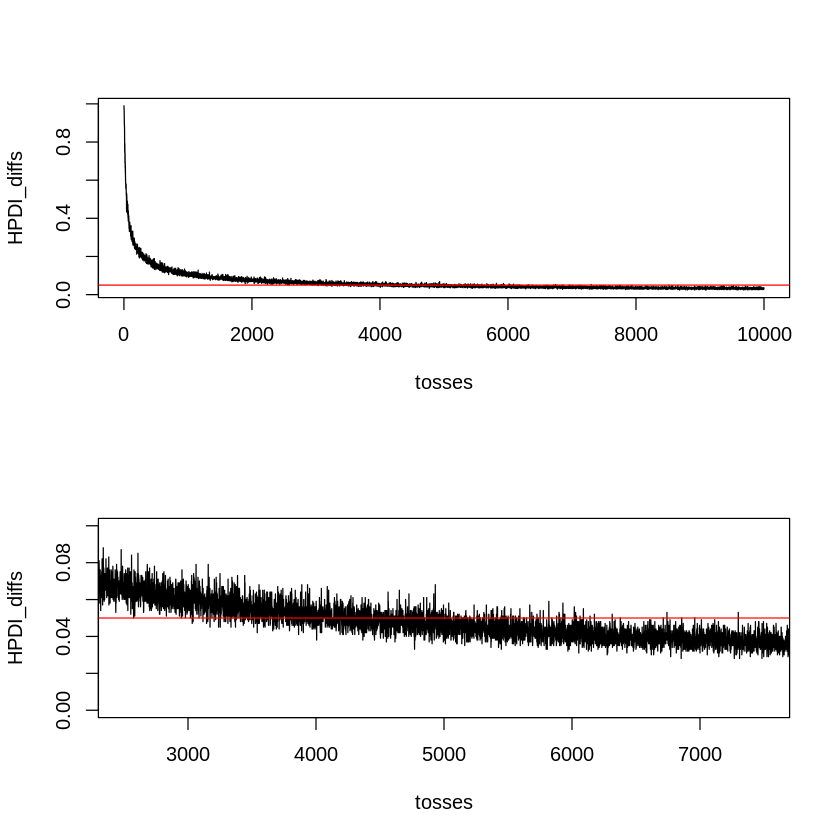

In [ ]:
tosses <- 1:10000
worst_p <- 0.5

p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1,1000)
HPDI_diffs <- numeric(length=length(tosses))
  for(i in 1:length(tosses)){
    waters <- rbinom(n=100, size=tosses[i], prob=worst_p)
    likelihood <- dbinom(x=waters, size=tosses[i], prob=p_grid)
    posterior <- prior*likelihood
    posterior <- posterior/sum(posterior)
    samples <- sample(x=p_grid, prob=posterior, size=10000, replace=TRUE)
    HPDIs <- HPDI(samples, 0.99)
    HPDI_diffs[[i]] <- diff(HPDIs)
  }

which(HPDI_diffs < 0.05)[1:500]

par(mfrow=c(2,1))
plot(HPDI_diffs ~ tosses, type="l")
abline(h=0.05, col="red")

plot(HPDI_diffs ~ tosses, type="l", ylim=c(0, 0.1), xlim=c(2500, 7500))
abline(h=0.05, col="red")

So the number of tosses is somewhere 3,000-6,000.

Notice that I used 50% as the value for *p*.  Why?  The reason is because, in a binomial distribution, the value that will be most uncertain and thus hardest to pin down is p=0.5.  It might be tempting to use p=0.7, given as the true value of *p* is earlier problems.  But remember, we **don't** know the true value of p before collecting data.  Therefore, I'm using the worst-case *p* to ensure we collect enough samples.

Look at what happens if we use higher or lower values of *p*; fewer samples are needed.

[1] 1067 1074 1083 1118 1173 1198 1208 1228 1247 1267 1269 1273 1282 1290 1301
 [16] 1309 1312 1313 1314 1332 1333 1341 1342 1352 1362 1363 1365 1370 1376 1382
 [31] 1383 1384 1387 1388 1392 1398 1405 1410 1411 1416 1417 1418 1419 1420 1425
 [46] 1431 1432 1433 1435 1440 1445 1452 1453 1454 1455 1460 1461 1464 1467 1468
 [61] 1474 1476 1481 1482 1485 1486 1487 1490 1491 1493 1494 1497 1499 1504 1505
 [76] 1507 1512 1513 1514 1516 1518 1519 1520 1521 1525 1528 1529 1530 1532 1538
 [91] 1540 1541 1542 1545 1546 1547 1548 1549 1551 1552 1554 1555 1557 1559 1560
[106] 1561 1564 1565 1567 1568 1570 1571 1573 1574 1577 1579 1580 1582 1587 1590
[121] 1592 1593 1594 1596 1598 1600 1602 1603 1604 1605 1606 1607 1608 1609 1610
[136] 1612 1614 1615 1616 1619 1620 1621 1622 1623 1626 1628 1629 1631 1632 1636
[151] 1637 1638 1639 1641 1646 1647 1648 1649 1652 1653 1655 1658 1660 1663 1665
[166] 1667 1668 1669 1671 1673 1674 1675 1678 1680 1681 1682 1683 1684 1685 1687
[181] 1688 1689 1690 1692 1693 1694 1696 1697 1698 1699 1701 1702 1704 1706 1707
[196] 1708 1709 1710 1712 1713 1714 1715 1716 1717 1719 1720 1721 1722 1723 1725
[211] 1726 1727 1729 1730 1731 1732 1734 1736 1737 1738 1739 1740 1744 1745 1747
[226] 1749 1750 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1763 1764
[241] 1767 1768 1769 1770 1771 1772 1774 1775 1776 1777 1779 1780 1781 1782 1783
[256] 1784 1785 1786 1788 1789 1790 1791 1792 1793 1794 1795 1797 1798 1802 1803
[271] 1804 1805 1807 1808 1810 1811 1812 1813 1816 1817 1818 1819 1820 1821 1823
[286] 1825 1826 1827 1828 1829 1830 1831 1832 1834 1835 1836 1837 1838 1839 1840
[301] 1841 1842 1843 1844 1846 1847 1848 1849 1850 1851 1852 1854 1855 1856 1858
[316] 1859 1860 1861 1863 1864 1865 1867 1868 1869 1870 1872 1875 1877 1878 1880
[331] 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895
[346] 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910
[361] 1911 1912 1913 1914 1915 1916 1917 1918 1919 1922 1923 1924 1925 1926 1927
[376] 1928 1929 1930 1931 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943
[391] 1944 1945 1946 1947 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1960
[406] 1961 1962 1963 1964 1965 1966 1967 1969 1970 1971 1972 1973 1974 1975 1976
[421] 1977 1978 1979 1980 1981 1982 1983 1985 1987 1988 1989 1990 1991 1992 1993
[436] 1994 1995 1996 1997 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
[451] 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024
[466] 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039
[481] 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054
[496] 2055 2056 2057 2058 2059

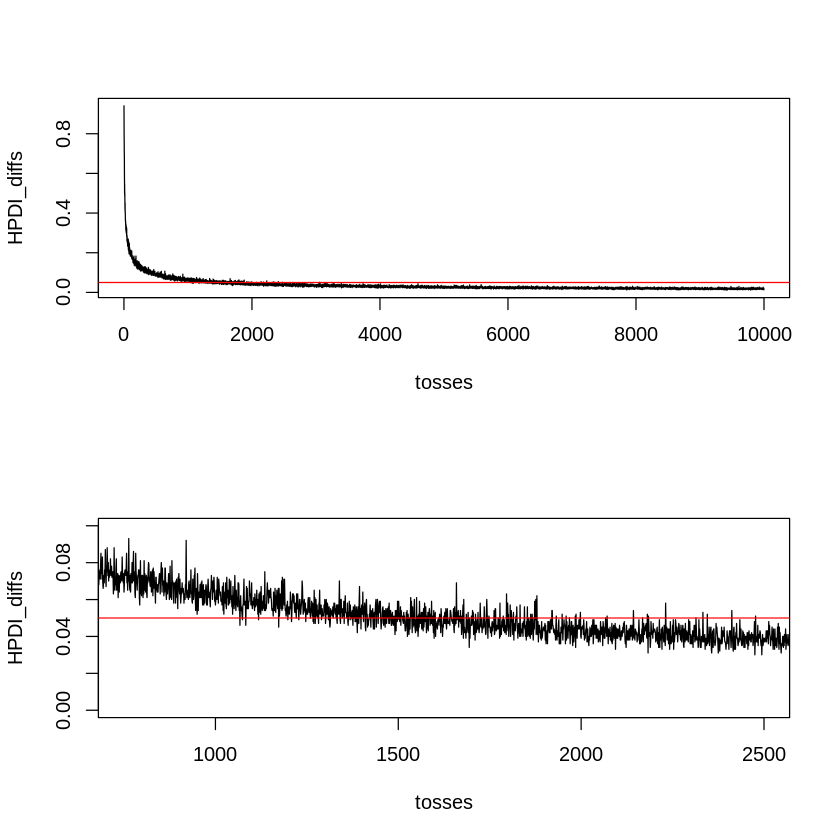

In [ ]:
tosses <- 1:10000
high_p <- 0.9

p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1,1000)
HPDI_diffs <- numeric(length=length(tosses))
  for(i in 1:length(tosses)){
    waters <- rbinom(n=100, size=tosses[i], prob=high_p)
    likelihood <- dbinom(x=waters, size=tosses[i], prob=p_grid)
    posterior <- prior*likelihood
    posterior <- posterior/sum(posterior)
    samples <- sample(x=p_grid, prob=posterior, size=10000, replace=TRUE)
    HPDIs <- HPDI(samples, 0.99)
    HPDI_diffs[[i]] <- diff(HPDIs)
  }

which(HPDI_diffs < 0.05)[1:500]

par(mfrow=c(2,1))
plot(HPDI_diffs ~ tosses, type="l")
abline(h=0.05, col="red")

plot(HPDI_diffs ~ tosses, type="l", ylim=c(0, 0.1), xlim=c(750, 2500))
abline(h=0.05, col="red")

[1] 1037 1039 1074 1161 1166 1169 1176 1181 1188 1197 1208 1212 1227 1235 1236
 [16] 1256 1268 1271 1277 1279 1311 1319 1327 1331 1335 1338 1343 1345 1350 1352
 [31] 1353 1355 1356 1359 1360 1361 1364 1365 1370 1378 1381 1383 1386 1393 1395
 [46] 1396 1400 1402 1403 1405 1411 1414 1416 1418 1419 1420 1421 1424 1429 1431
 [61] 1433 1436 1439 1444 1446 1450 1451 1453 1454 1455 1461 1468 1472 1474 1477
 [76] 1480 1484 1485 1486 1487 1493 1494 1495 1499 1500 1502 1508 1509 1510 1512
 [91] 1513 1516 1520 1522 1525 1526 1530 1532 1535 1536 1538 1539 1540 1547 1548
[106] 1549 1551 1553 1556 1557 1559 1561 1566 1571 1572 1573 1577 1579 1580 1581
[121] 1582 1583 1585 1586 1587 1589 1590 1596 1599 1600 1602 1604 1607 1608 1609
[136] 1611 1612 1613 1614 1618 1619 1620 1622 1623 1624 1625 1626 1627 1628 1629
[151] 1630 1631 1632 1633 1635 1638 1642 1645 1647 1648 1649 1650 1652 1653 1654
[166] 1655 1659 1662 1663 1664 1665 1667 1669 1670 1671 1672 1673 1674 1675 1676
[181] 1678 1679 1681 1683 1684 1686 1687 1688 1689 1690 1692 1693 1694 1697 1699
[196] 1700 1701 1702 1704 1705 1706 1707 1708 1709 1710 1711 1712 1713 1714 1715
[211] 1717 1718 1720 1721 1722 1723 1724 1725 1726 1728 1729 1731 1734 1735 1736
[226] 1737 1738 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1752
[241] 1753 1754 1755 1756 1758 1759 1760 1761 1762 1763 1764 1766 1767 1768 1769
[256] 1772 1775 1776 1779 1780 1781 1782 1783 1785 1786 1787 1788 1789 1790 1791
[271] 1792 1794 1795 1797 1798 1799 1800 1801 1802 1803 1804 1807 1808 1809 1811
[286] 1812 1813 1814 1817 1818 1820 1821 1822 1823 1824 1825 1826 1828 1829 1830
[301] 1831 1832 1835 1836 1837 1839 1843 1844 1845 1846 1847 1848 1850 1851 1853
[316] 1854 1855 1856 1857 1859 1860 1861 1862 1863 1864 1866 1867 1868 1870 1872
[331] 1873 1875 1876 1877 1878 1881 1882 1883 1884 1886 1887 1888 1889 1890 1891
[346] 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906
[361] 1908 1909 1910 1912 1913 1914 1915 1917 1918 1919 1921 1922 1923 1924 1925
[376] 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1938 1939 1940 1941
[391] 1942 1943 1945 1946 1947 1948 1949 1950 1952 1953 1954 1955 1956 1957 1958
[406] 1959 1960 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1973 1974 1975
[421] 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
[436] 1991 1992 1993 1994 1995 1996 1998 1999 2000 2001 2003 2004 2005 2006 2007
[451] 2008 2010 2012 2013 2014 2015 2017 2018 2019 2020 2021 2022 2023 2024 2025
[466] 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040
[481] 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055
[496] 2056 2057 2058 2059 2060

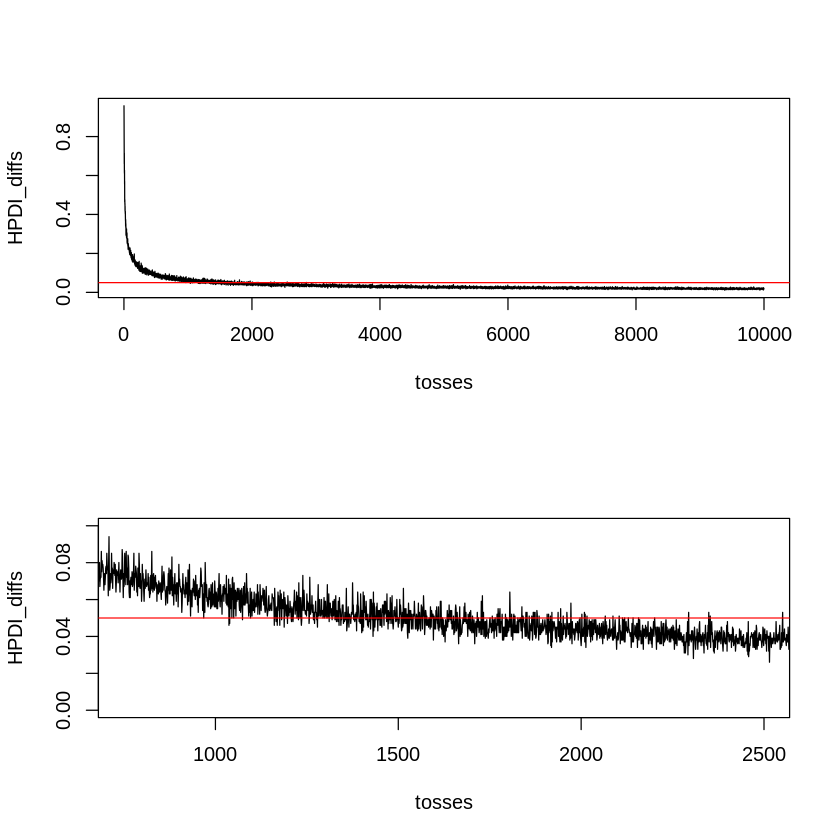

In [ ]:
tosses <- 1:10000
low_p <- 0.1

p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1,1000)
HPDI_diffs <- numeric(length=length(tosses))
  for(i in 1:length(tosses)){
    waters <- rbinom(n=100, size=tosses[i], prob=low_p)
    likelihood <- dbinom(x=waters, size=tosses[i], prob=p_grid)
    posterior <- prior*likelihood
    posterior <- posterior/sum(posterior)
    samples <- sample(x=p_grid, prob=posterior, size=10000, replace=TRUE)
    HPDIs <- HPDI(samples, 0.99)
    HPDI_diffs[[i]] <- diff(HPDIs)
  }

which(HPDI_diffs < 0.05)[1:500]

par(mfrow=c(2,1))
plot(HPDI_diffs ~ tosses, type="l")
abline(h=0.05, col="red")

plot(HPDI_diffs ~ tosses, type="l", ylim=c(0, 0.1), xlim=c(750, 2500))
abline(h=0.05, col="red")

## Hard
The Hard problems here all use the data below. These data indicate the gender (male=1, female=0) of officially reported first and second born children in 100 two-child families.  You can load these two  vectors into R’s memory by typing:



In [ ]:
data(homeworkch3)
head(data.frame(birth1=birth1, birth2=birth2))

,birth1,birth2
,<dbl>,<dbl>
1,1,0
2,0,1
3,0,0
4,0,1
5,1,0
6,1,1


So for example, the first family in the data reported a boy (1) and then a girl (0). The second family  reported a girl (0) and then a boy (1). The third family reported two girls.

Use these vectors as data. So for example to compute the total number of boys born across all of these births, you could use:

In [ ]:
sum(birth1) + sum(birth2)

[1] 111

### 3H1
#### Question
Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

#### Answer
This is very much like the globe-tossing example, so we'll similar code with a few tweaks.

Same 1: Like the globe-tossing example, this data can also be modeled as a binomial distribution.  Why?  Because each observation is either *girl=0* or *boy=1*.  This means we're trying to estimate the parameter *p*, the probability of *boy* or probability of *girl*.  Thus, we'll set up our grid just as we did before.

In [ ]:
p_grid <- seq(from=0, to=1, length.out=1000)


Tweak 1: The question asks us to use a uniform prior.  But we'll use our extensive research to conclude that the prior probability of boy or girl is about 50%.  Feel free to change the code to get see what happens if we use a uniform prior.

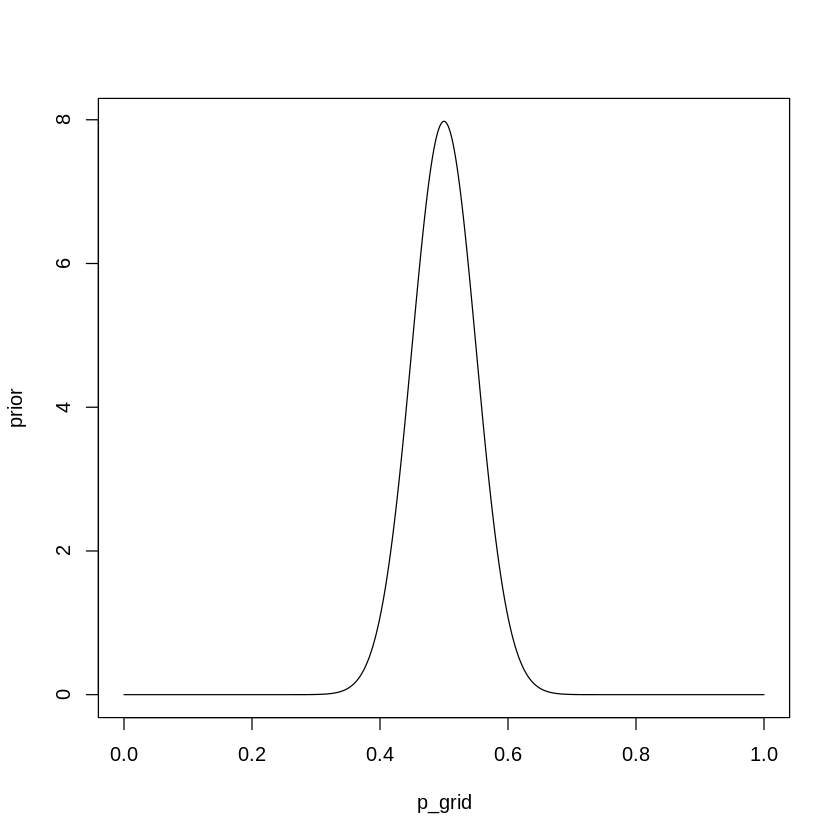

In [ ]:
prior <- dnorm(p_grid, mean=0.5, sd=0.05)
plot(prior ~ p_grid, type="l")

What this is telling us is that we believe the most probable value for the proportion of boys is 50%, but we wouldn't be surprised if it was between 40-60%, and really surprised if it was outside of this.  Some people would quibble with this prior as being too narrow...and they might be right.  But we'll work with it here.

Same 2: Since we're modeling our data as binomial, we can use a similar liklihood statement as before.

[1] 0.5365365

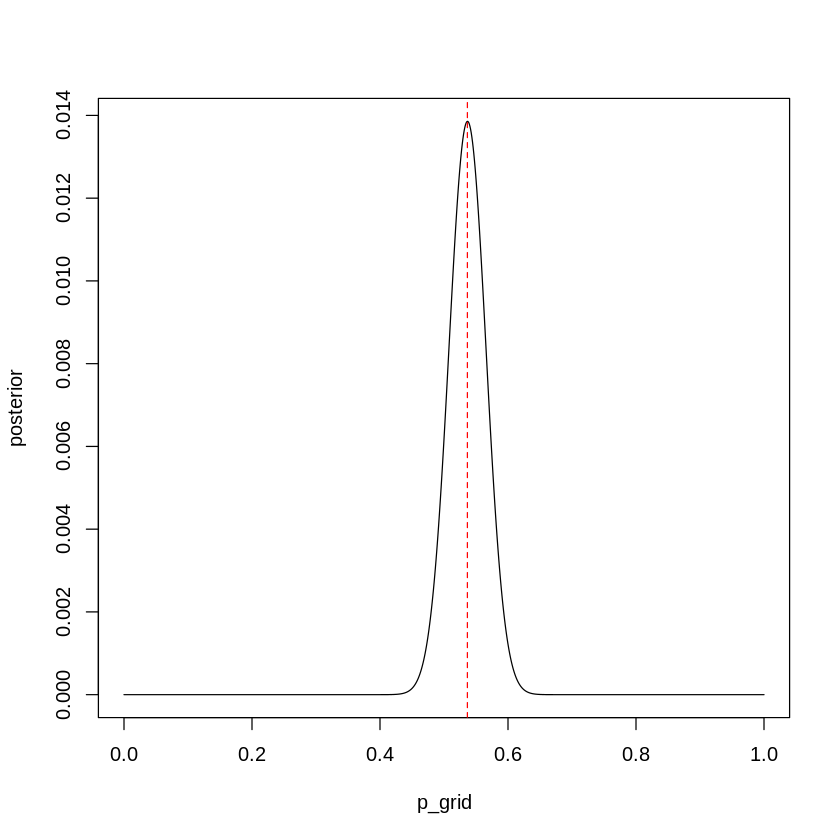

In [ ]:
boys <- sum(birth1) + sum(birth2)
total_births <- length(birth1) + length(birth2)

likelihood <- dbinom(boys, size=total_births, prob=p_grid)
posterior <- likelihood*prior
posterior <- posterior/sum(posterior)

(MAP <- p_grid[which.max(posterior)])

plot(posterior ~ p_grid, type="l")
abline(v=MAP, col="red", lty=2)

### 3H2
#### Question
Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior density intervals.

#### Answer
We can use code similar to what we've already used.

In [ ]:
samples <- sample(x=p_grid, prob=posterior, size=1e4, replace=TRUE)

round(HPDI(samples, 0.50), 4)*100
round(HPDI(samples, 0.89), 4)*100
round(HPDI(samples, 0.97), 4)*100

|0.5  0.5| 
51.55 55.36

|0.89 0.89| 
49.45 58.36

|0.97 0.97| 
47.55 59.76

### 3H3
#### Question
Use rbinom to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize the simulations, but the dens command (part of the rethinking package) is probably the  easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?

#### Answer
We're being asked to create a posterior-predictive check (PPC), where we compare our data with our model's expections for identical experiements.

Let's start by doing what we're told to do: create 10,000 replicated datasets, each representing 200 births, with the probability of boy for each dataset drawn from the posterior.

In [ ]:
replicates <- rbinom(n=10000, size=200, prob=samples)
str(replicates)

 int [1:10000] 105 107 122 112 99 113 108 109 109 110 ...


We used the `str()` function to get a glimpse of the data.  You'll see a vector of 10,000 elements, each with a number representing the number of boys in 200 births.

Now we need to see how similar `replicates` looks to our posterior distribution.  Let's visulaize this, as the questions suggests, with the `dens()` function, as well as with a histogram.  We'll also plot our actual data so as to make the PPC comparison.

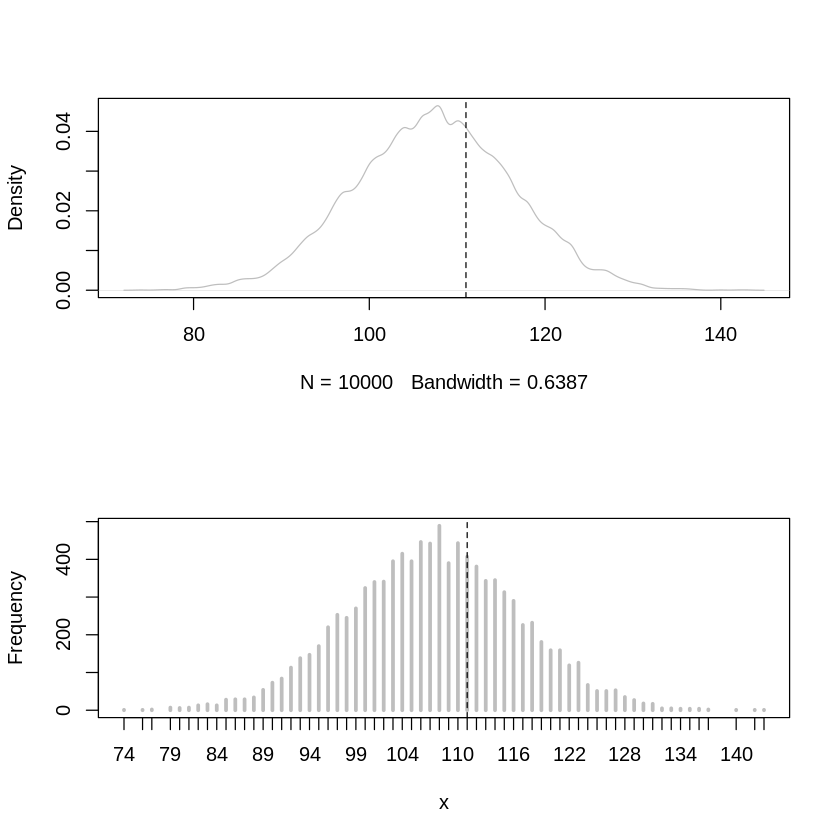

In [ ]:
par(mfrow=c(2,1))

dens(replicates, col="grey")
abline(v=boys, col="black", lty=2)

simplehist(replicates, col="grey")
abline(v=boys, col="black", lty=2)

So our observed data is basically right in the meat of the posterior-predictive distribution.  I'd say the model is doing okay so far.

### 3H4
#### Question
Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, `birth1`. How does the model look in this light?

#### Answer
We're essentially repeating what we did for problem 3H3, but only for the first-borns `brith1`; we'll do the same for second-borns, `birth2`, too.  This could seem boring at first, but what would it mean if our model now does a poor job of predicting the sex of the first born?  What would it mean if the model does a poor job of predicting the sex of the second born?

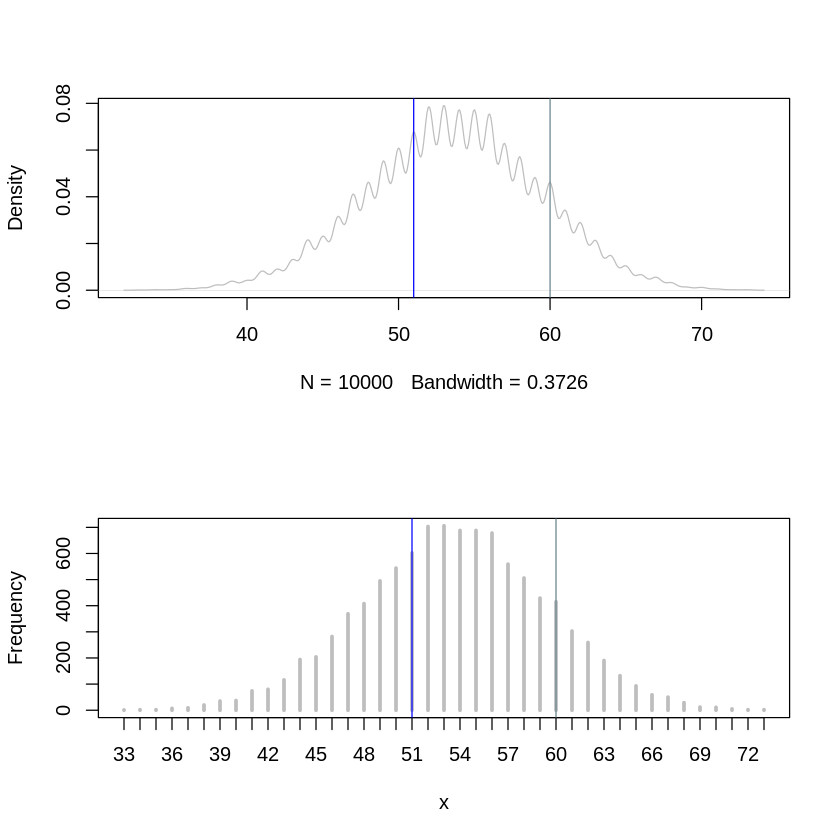

In [ ]:
replicates <- rbinom(n=10000, size=100, prob=samples)

par(mfrow=c(2,1))

dens(replicates, col="grey")
abline(v=sum(birth1), col="blue")
abline(v=sum(birth2), col="lightblue4")

simplehist(replicates, col="grey")
abline(v=sum(birth1), col="blue")
abline(v=sum(birth2), col="lightblue4")

How well is our model doing now?  At first glance, it seems that both lines are more or less in the meat of the posterior-predictive distribution.  But at least the lightblue line for second-borns `birth2` is getting away from the center.  It's also interesting to note that the darkblue line for first-borns `birth1` is really close to 50%.  Does this suggest that, while the sex of the first-born is basically a coin flip, the sex of the second-born is affected by the sex of the first?  We'll pick that pu in 3H5.

### 3H5
#### Question
The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts  of boys to only those second births that followed girls. To do this correctly, you need to count the  number of first borns who were girls and simulate that many births, 10,000 times. Compare the  counts of boys in your simulations to the actual observed count of boys following girls. How does the  model look in this light? Any guesses what is going on in these data?

#### Answer


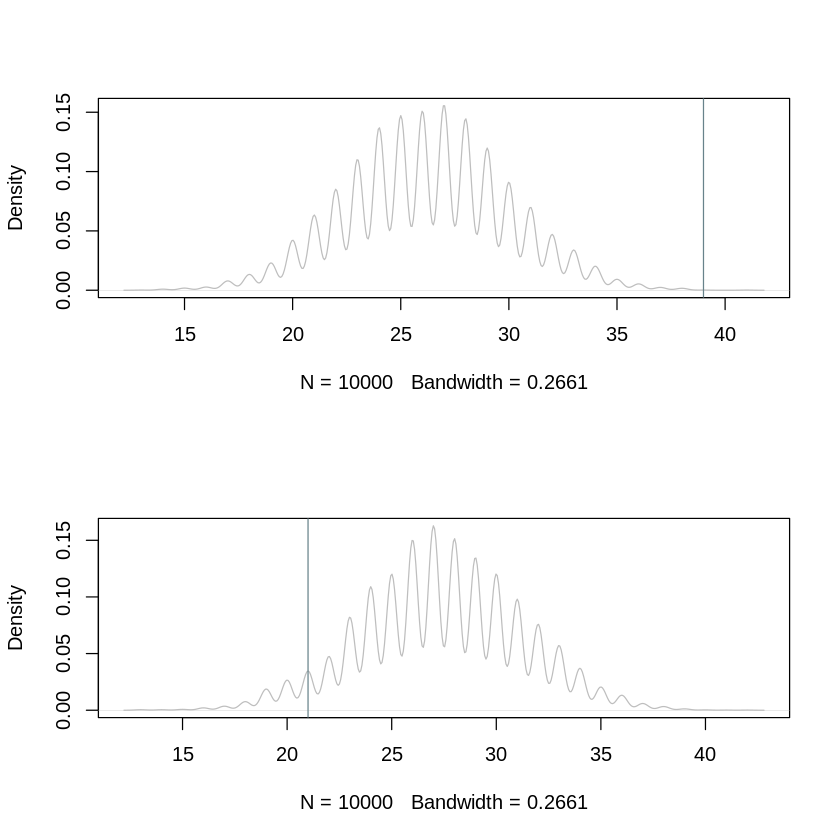

In [ ]:
after_girl <- birth2[birth1==0]
after_boy <- birth2[birth1==1]

replicates_after_girl <- rbinom(10000, size=length(after_girl), prob=samples)
replicates_after_boy <- rbinom(10000, size=length(after_boy), prob=samples)

par(mfrow=c(2,1))

dens(replicates_after_girl, col="grey")
abline(v=sum(after_girl), col="lightblue4")

dens(replicates_after_boy, col="grey")
abline(v=sum(after_boy), col="lightblue4")

Pretty interesting.  It seems that the there are way more second-born boys after first-born girls, and way fewer second-born boys after first-born boys.  Combined with our answer to 3H4, this makes it increasingly plausible that the sex of the first-born child affects the sex of the second born.